In [0]:
# Import necessry libaries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from numpy import random, float, array
import numpy as np
import seaborn as sns

%matplotlib inline

In [0]:
# load dataset
data = pd.read_csv('TamilNadu_Crime_Data_2001_2012.csv')

In [349]:
# dataset shape

data.shape

(1440, 7)

In [350]:
# datadest information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
CRIME_YEAR                           1440 non-null int64
CRIME_STATE                          1440 non-null object
CRIME_CITY                           1440 non-null object
CRIME_CITY_LATTITUDE                 1440 non-null float64
CRIME_CITY_LONGTITUDE                1440 non-null float64
CRIME_TYPE                           1440 non-null object
NUMBER_OF_CRIME_IN_THE_CRIME_TYPE    1440 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 78.9+ KB


In [351]:
# dataset statistical description

data.describe()

,CRIME_YEAR,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,2006.500000,11.227500,78.388950,178.763194
std,3.453252,1.553465,1.063606,398.961224
min,2001.000000,8.741200,76.955800,0.000000
25%,2003.750000,9.925200,77.694600,10.000000
50%,2006.500000,11.340550,78.132900,43.000000
75%,2009.250000,12.934900,79.146800,125.500000
max,2012.000000,13.082600,80.270700,3779.000000


In [352]:
# dataset summary view

data.head()

,CRIME_YEAR,CRIME_STATE,CRIME_CITY,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,CRIME_TYPE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
0,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,MURDER,91
1,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,ATTEMPT TO MURDER,298
2,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0
3,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,RAPE,28
4,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,OTHER RAPE,28


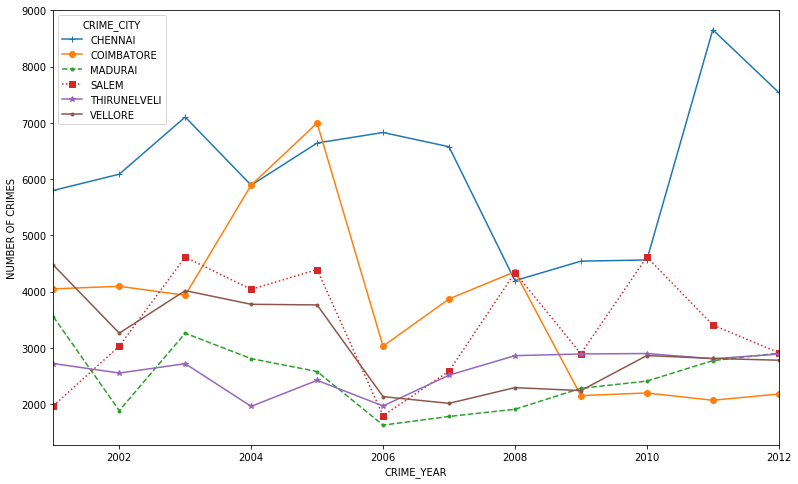

In [353]:
# lineplot - no. of crimes vs year and city

fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('YEARS')
ax.set_ylabel('NUMBER OF CRIMES')
data.groupby(['CRIME_YEAR', 'CRIME_CITY']).sum()['NUMBER_OF_CRIME_IN_THE_CRIME_TYPE'].unstack().plot(ax=ax,style=['+-','o-','.--','s:', '*-', '.-'])


In [354]:
# copying data
data_copy = data

# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 

# Encode labels in column 'CRIME_CITY'. 
data['CRIME_CITY']= label_encoder.fit_transform(data['CRIME_CITY']) 
data['CRIME_CITY'].unique() 

# Encode labels in column 'CRIME_STATE'. 
data['CRIME_STATE']= label_encoder.fit_transform(data['CRIME_STATE']) 
data['CRIME_STATE'].unique() 

# Encode labels in column 'CRIME_TYPE'. 
data['CRIME_TYPE']= label_encoder.fit_transform(data['CRIME_TYPE']) 
data['CRIME_TYPE'].unique() 


array([14,  1,  7, 16, 15, 11, 13, 12,  8, 18,  2, 19, 17,  6,  4,  5, 10,
        9,  0,  3])

In [355]:
# after label encoding

data.head()


,CRIME_YEAR,CRIME_STATE,CRIME_CITY,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,CRIME_TYPE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
0,2001,0,0,13.0826,80.2707,14,91
1,2001,0,0,13.0826,80.2707,1,298
2,2001,0,0,13.0826,80.2707,7,0
3,2001,0,0,13.0826,80.2707,16,28
4,2001,0,0,13.0826,80.2707,15,28


In [356]:
# after label encoding

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
CRIME_YEAR                           1440 non-null int64
CRIME_STATE                          1440 non-null int64
CRIME_CITY                           1440 non-null int64
CRIME_CITY_LATTITUDE                 1440 non-null float64
CRIME_CITY_LONGTITUDE                1440 non-null float64
CRIME_TYPE                           1440 non-null int64
NUMBER_OF_CRIME_IN_THE_CRIME_TYPE    1440 non-null int64
dtypes: float64(2), int64(5)
memory usage: 78.9 KB


In [357]:
''' # standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
data_scaled = pd.DataFrame(data_scaled)
data_scaled.describe() '''

# case 1: K-means

X = data[['CRIME_YEAR', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE']]

clusters = KMeans(9)
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

data['crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['crime_clusters'],ascending = True)
X.head()



,CRIME_YEAR,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
0,2001,91
1,2001,298
2,2001,0
3,2001,28
4,2001,28


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


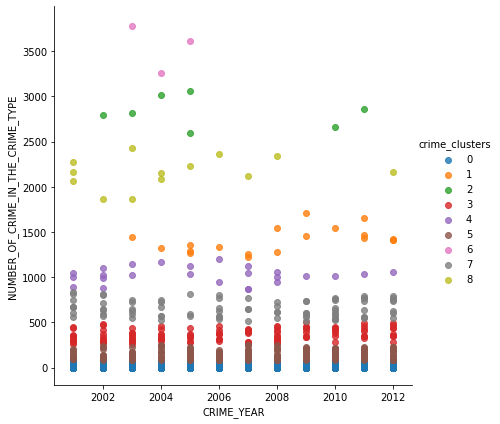

In [358]:
sns.lmplot('CRIME_YEAR' ,'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', data=data,
        hue = "crime_clusters",
        fit_reg=False, size = 6 );

In [359]:
# case 2: K-means

X = data[['CRIME_YEAR', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', 'CRIME_CITY']]

clusters = KMeans(6)
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

data['crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['crime_clusters'],ascending = True)
X.head()

,CRIME_YEAR,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE,CRIME_CITY
0,2001,91,0
1,2001,298,0
2,2001,0,0
3,2001,28,0
4,2001,28,0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


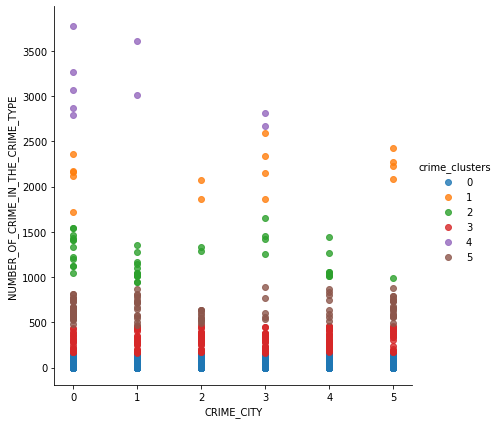

In [360]:
sns.lmplot('CRIME_CITY' ,'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', data=data,
        hue = "crime_clusters",
        fit_reg=False, size = 6 );

In [361]:
# case 3: K-means

X = data[['CRIME_TYPE', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', 'CRIME_CITY']]

clusters = KMeans(20)
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

data['crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['crime_clusters'],ascending = True)
X.head()

,CRIME_TYPE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE,CRIME_CITY
0,14,91,0
1,1,298,0
2,7,0,0
3,16,28,0
4,15,28,0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


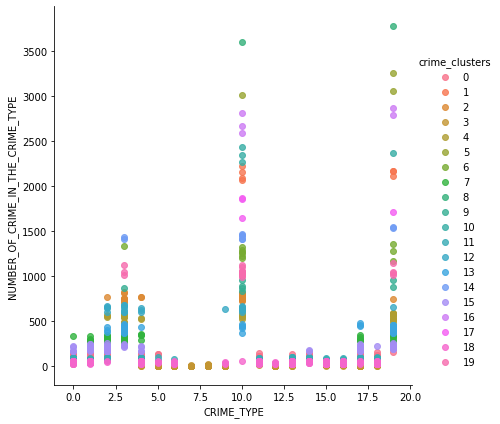

In [362]:
sns.lmplot('CRIME_TYPE' ,'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', data=data,
        hue = "crime_clusters",
        fit_reg=False, size = 6 );

In [363]:
# case 4: K-means

'''X = data[['CRIME_TYPE', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', 'CRIME_CITY_LATTITUDE', 'CRIME_CITY_LONGTITUDE']]

clusters = KMeans(6)
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

data['crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['crime_clusters'],ascending = True)
X.head()'''

"X = data[['CRIME_TYPE', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE', 'CRIME_CITY_LATTITUDE', 'CRIME_CITY_LONGTITUDE']]\n\nclusters = KMeans(6)\nclusters.fit(X)\nclusters.cluster_centers_\nclusters.labels_\n\ndata['crime_clusters'] = clusters.labels_\ndata.head()\ndata.sort_values(by=['crime_clusters'],ascending = True)\nX.head()"

In [364]:
''''sns.lmplot('CRIME_YEAR', 'CRIME_TYPE', data=data,
        hue = "crime_clusters",
        fit_reg=False, size = 6 );'''

'\'sns.lmplot(\'CRIME_YEAR\', \'CRIME_TYPE\', data=data,\n        hue = "crime_clusters",\n        fit_reg=False, size = 6 );'

In [365]:
# KNN

X = data_copy.drop('CRIME_TYPE',axis=1).values
y = data_copy['CRIME_TYPE'].values

print(X.shape)
print(y.shape)

(1440, 7)
(1440,)


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

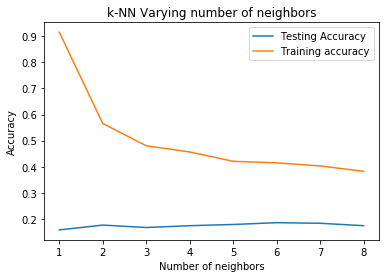

In [368]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [369]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [370]:
knn.score(X_test,y_test)

0.18518518518518517

In [371]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 5,  1,  2,  1,  3,  0,  0,  0,  0,  0,  0,  3,  0,  1,  3,  1,
         0,  0,  1,  0],
       [ 4,  5,  3,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  1,  3,  0,
         0,  2,  0,  0],
       [ 3,  2,  3,  2,  1,  0,  0,  0,  0,  0,  3,  4,  0,  0,  0,  0,
         0,  3,  0,  1],
       [ 0,  2,  2,  5,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,
         0,  1,  0,  6],
       [ 4,  2,  2,  1,  3,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  2,
         0,  0,  1,  2],
       [ 0,  0,  0,  0,  1,  3,  0, 11,  3,  2,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  5,  2,  1,  0,  0,  0,  5,  0,  0,  0,
         2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  1,  6,  3,  0,  0,  0,  2,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  2,  5,  6,  3,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  4,  0,  5,  1,  0,  0,  3,  1,  0,  2,
         0,  1,  0,  0],
       [ 0,  0,  1,  7,  0,  0

In [372]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
True,,,,,,,,,,,,,,,,,,,,,
0,5,1,2,1,3,0,0,0,0,0,0,3,0,1,3,1,0,0,1,0,21
1,4,5,3,0,2,0,0,0,0,0,0,1,0,1,3,0,0,2,0,0,21
2,3,2,3,2,1,0,0,0,0,0,3,4,0,0,0,0,0,3,0,1,22
3,0,2,2,5,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,6,21
4,4,2,2,1,3,0,0,0,1,0,1,1,0,1,1,2,0,0,1,2,22
5,0,0,0,0,1,3,0,11,3,2,0,0,0,0,1,0,0,0,0,0,21
6,0,0,0,0,0,6,5,2,1,0,0,0,5,0,0,0,2,1,0,0,22
7,0,0,0,0,0,9,1,6,3,0,0,0,2,0,0,0,0,1,0,0,22
8,0,0,0,0,0,4,2,5,6,3,0,0,1,0,0,0,0,0,0,0,21


In [373]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.14      0.24      0.17        21
           1       0.19      0.24      0.21        21
           2       0.14      0.14      0.14        22
           3       0.21      0.24      0.22        21
           4       0.14      0.14      0.14        22
           5       0.09      0.14      0.11        21
           6       0.18      0.23      0.20        22
           7       0.22      0.27      0.24        22
           8       0.22      0.29      0.25        21
           9       0.07      0.05      0.06        22
          10       0.47      0.64      0.54        22
          11       0.23      0.33      0.27        21
          12       0.12      0.09      0.10        22
          13       0.12      0.09      0.11        22
          14       0.11      0.09      0.10        22
          15       0.20      0.19      0.20        21
          16       0.11      0.05      0.06        22
          17       0.18    